1. Подготовка данных

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Данные из задания
X = np.array([87, 135, 65, 80, 112, 9, 93, 91, 21, 8, 80, 6, 27, 90, 12, 76, 26, 105, 14, 3, 41, 7, 15, 32])
Y = np.array([10, 40, 43, 22, 9, 21, 8, 80, 6, 27, 90, 12, 76, 26, 105, 14, 3, 41, 7, 15, 32, 7, 15, 32])

# Создаем DataFrame
df = pd.DataFrame({'Voice_power_dB': X, 'Heavy_objects_kg': Y})
df.to_csv('../data/voice_weight.csv', index=False)  # Сохраняем для архива

2. Визуальный анализ

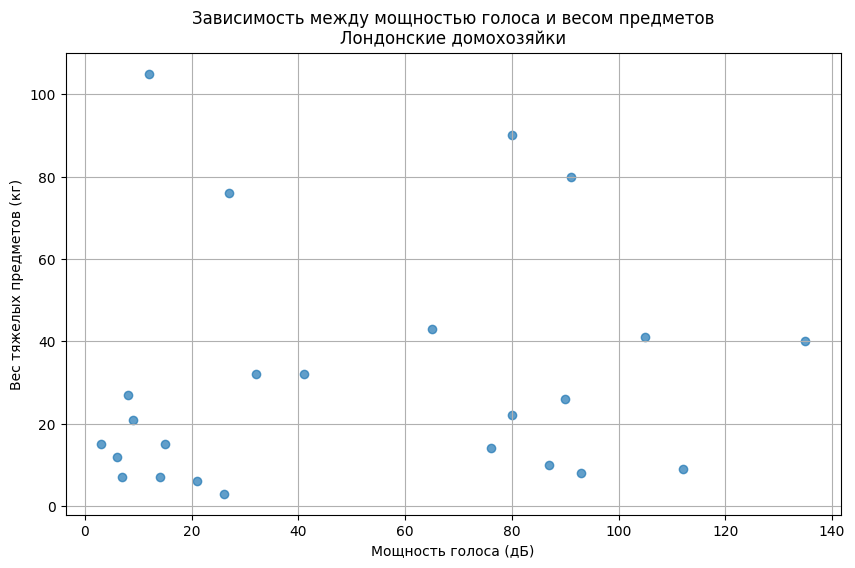

In [13]:
# График рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7)
plt.title('Зависимость между мощностью голоса и весом предметов\nЛондонские домохозяйки')
plt.xlabel('Мощность голоса (дБ)')
plt.ylabel('Вес тяжелых предметов (кг)')
plt.grid(True)
plt.show()

3. Проверка корреляци

In [14]:
# Проверка нормальности распределения
_, p_x = stats.shapiro(X)
_, p_y = stats.shapiro(Y)
print(f"Тест Шапиро-Уилка:\nX: p-value={p_x:.4f}\nY: p-value={p_y:.4f}")

# Выбор метода корреляции
if p_x > 0.05 and p_y > 0.05:
    method = 'pearson'
    print("\nДанные нормально распределены, используем корреляцию Пирсона")
else:
    method = 'spearman'
    print("\nДанные не нормально распределены, используем корреляцию Спирмена")

# Расчет корреляции
corr, p_value = stats.pearsonr(X, Y) if method == 'pearson' else stats.spearmanr(X, Y)
print(f"\nКоэффициент корреляции ({method}): {corr:.3f}")
print(f"p-value: {p_value:.4f}")

Тест Шапиро-Уилка:
X: p-value=0.0124
Y: p-value=0.0005

Данные не нормально распределены, используем корреляцию Спирмена

Коэффициент корреляции (spearman): 0.231
p-value: 0.2782


4. Проверка гипотезы

In [15]:
# Уровень значимости
alpha = 0.1

# Интерпретация
print("\nГипотеза H0: Факторы независимы (корреляция = 0)")
print(f"Уровень значимости α = {alpha}")

if p_value < alpha:
    print(f"\nРезультат: p-value ({p_value:.4f}) < α ({alpha})")
    print("Отвергаем H0: Есть статистически значимая зависимость")
    print(f"Направление связи: {'положительная' if corr > 0 else 'отрицательная'}")
else:
    print(f"\nРезультат: p-value ({p_value:.4f}) >= α ({alpha})")
    print("Не отвергаем H0: Статистически значимой зависимости не обнаружено")


Гипотеза H0: Факторы независимы (корреляция = 0)
Уровень значимости α = 0.1

Результат: p-value (0.2782) >= α (0.1)
Не отвергаем H0: Статистически значимой зависимости не обнаружено


5. Сохранение результатов

In [16]:
# Сохранение результатов анализа
results = {
    'correlation_coefficient': corr,
    'p_value': p_value,
    'correlation_type': method,
    'conclusion': 'significant' if p_value < alpha else 'not significant'
}

import json
with open('../results/task1_results.json', 'w') as f:
    json.dump(results, f, indent=2)